This program uses LSTM Long short term memory to predict the closing stock price using the past 60 days stock prices

In [4]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas_datareader as pdr
import os

In [7]:
os.chdir('D:\\Abroad\\Corizo')

In [10]:
!pip install keras
!pip install tensorflow

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [11]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
df=pd.read_csv('1613615-Stock_Price_data_set.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [14]:
df.shape

(1009, 7)

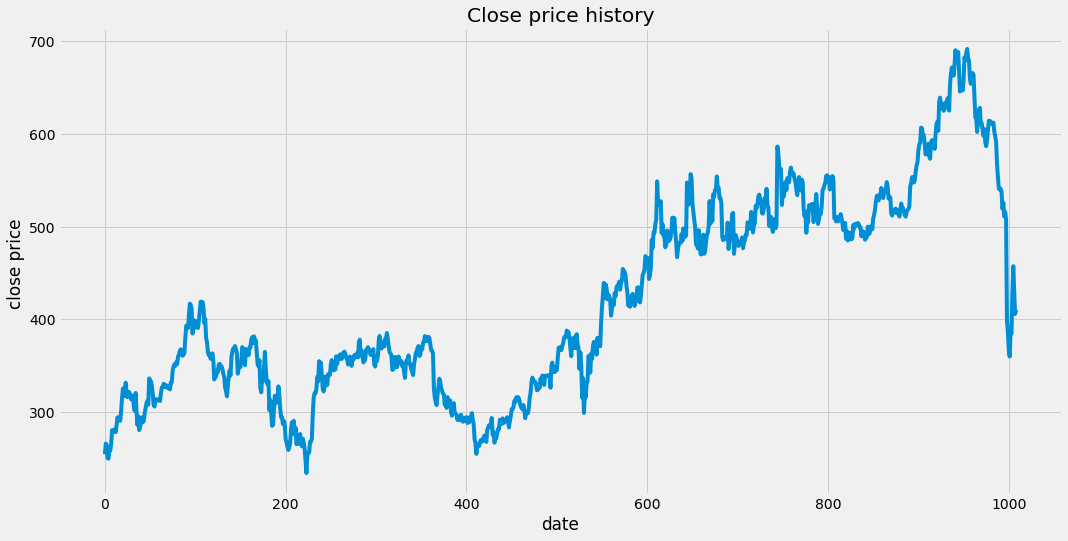

In [16]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('date')
plt.ylabel('close price ')
plt.show()


In [17]:
#create a new dataframe with only the close column
data=df.filter(['Close'])

In [18]:
#convert the dataframe into numpy arry
dataset=data.values

In [20]:
#get the number of rows to train the model
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

808

In [21]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [22]:
#create the training data set
#create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range (60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09

In [23]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [24]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(748, 60, 1)

In [25]:
#build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

748/748 [==============================] - 21s 24ms/step - loss: 0.0037


In [28]:
#create the testing data set
#create the new array containing scaled values from index 
test_data=scaled_data[training_data_len-60:,:]
#create the data set x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [29]:
#convert data into numpy
x_test=np.array(x_test)

In [30]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [31]:
#get the model predicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

7/7 [==============================] - 1s 17ms/step


array([[576.1169 ],
       [569.7405 ],
       [562.85187],
       [557.08624],
       [551.86316],
       [547.6319 ],
       [544.6367 ],
       [543.0955 ],
       [541.8463 ],
       [540.16754],
       [537.6212 ],
       [535.40594],
       [534.08704],
       [531.1871 ],
       [528.99524],
       [526.0645 ],
       [523.3702 ],
       [521.8898 ],
       [520.5591 ],
       [519.14404],
       [518.02795],
       [518.8841 ],
       [520.0361 ],
       [521.8485 ],
       [523.5496 ],
       [525.14417],
       [526.68713],
       [527.8935 ],
       [528.3502 ],
       [528.44006],
       [527.1276 ],
       [526.0078 ],
       [525.0538 ],
       [524.0066 ],
       [522.23315],
       [520.5275 ],
       [519.21313],
       [519.59283],
       [519.68945],
       [519.7582 ],
       [520.5309 ],
       [521.8177 ],
       [522.7305 ],
       [524.84924],
       [527.72107],
       [531.2764 ],
       [535.8527 ],
       [541.0958 ],
       [546.10156],
       [549.78314],


In [32]:
# get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

35.663497978603075

<ipython-input-35-b2687d28da4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


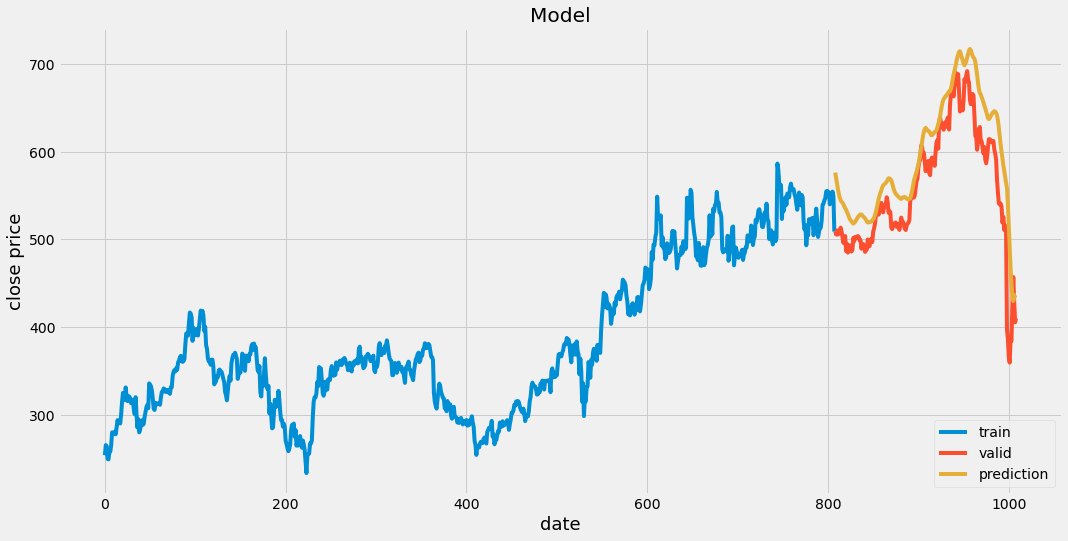

In [35]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#visualization of data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','valid','prediction'],loc='lower right')
plt.show()

In [34]:
valid #This shows the valid and actual prices

,Close,predictions
808,508.779999,576.116882
809,505.549988,569.740479
810,510.299988,562.851868
811,505.549988,557.086243
812,506.519989,551.863159
...,...,...
1004,427.140015,434.809204
1005,457.130005,429.846527
1006,429.480011,433.165649
1007,405.600006,436.742371
